In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import torch
import torch.nn as nn
import torchtext

In [4]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from   torchtext.vocab import FastText
import nltk
from nltk import ngrams

In [5]:
path="/kaggle/input/medium-articles/articles.csv"

In [6]:

data=pd.read_csv(path)['text']

In [7]:
data=data.apply(lambda x:simple_preprocess(x))

In [8]:
data1=pd.read_csv(path)['text']

In [9]:
from collections import defaultdict


In [10]:

vocab=defaultdict(int)
inx_word=defaultdict(lambda x: 'oov')
num=1
for i in range(len(data)):
    for o in range(len(data[i])):
        if data[i][o] not in vocab :
                 vocab[data[i][o]]=num
                 inx_word[num]=data[i][o]
                 num+=1
        data[i][o]   =  vocab[data[i][o]]

In [11]:
d4=data.apply(lambda x:list(ngrams(x,4, pad_left=True,left_pad_symbol=0)))

In [12]:
x=[]
y=[]
for row in range(len(d4)):
    for col in d4[row]:
        if not (col[1]==0 ):
                    x.append(col[:-1])
                    y.append(col[-1])

In [13]:
d5=data.apply(lambda x:list(ngrams(x,5, pad_left=True,left_pad_symbol=0)))

In [14]:
x5=[]
y5=[]
for row in range(len(d5)):
    for col in d5[row]:
        if not (  col[2]==0):
                    x5.append(col[:-1])
                    y5.append(col[-1])

In [15]:
d6=data.apply(lambda x:list(ngrams(x,6, pad_left=True,left_pad_symbol=0)))

In [16]:
x6=[]
y6=[]
for row in range(len(d6)):
    for col in d6[row]:
        if not (  col[3]==0):
                    x6.append(col[:-1])
                    y6.append(col[-1])

In [17]:
d7=data.apply(lambda x:list(ngrams(x,7, pad_left=True,left_pad_symbol=0)))

In [18]:
x7=[]
y7=[]
for row in range(len(d7)):
    for col in d7[row]:
        if not (  col[4]==0):
                    x7.append(col[:-1])
                    y7.append(col[-1])

In [19]:
x=torch.tensor(x).cuda()
y=torch.tensor(y).cuda()

In [20]:
x7=torch.tensor(x7).cuda()
y7=torch.tensor(y7).cuda()

In [21]:
x5=torch.tensor(x5).cuda()
y5=torch.tensor(y5).cuda()

In [22]:
x5=torch.tensor(x5).cuda()
y5=torch.tensor(y5).cuda()

In [23]:
x6=torch.tensor(x6).cuda()
y6=torch.tensor(y6).cuda()

In [24]:
from torch.utils.data import Dataset ,DataLoader

In [25]:
class dataset(Dataset):
     def __init__(self,x1,y1):
            self.x=x1
            self.y=y1
     def __len__(self):
        return len(self.x)
     def __getitem__(self,index):
            return     self.x[index],self.y[index]

In [26]:
x_train=x[:200000]
y_train=y[:200000]
x_valid=x[230000:240000]
y_valid=y[230000:240000]
train=dataset(x_train,y_train)
valid=dataset(x_valid,y_valid)
train_set=DataLoader(train,batch_size=32,shuffle=True)
valid_set=DataLoader(valid,batch_size=32,shuffle=True)

In [27]:
x_train=x5[:200000]
y_train=y5[:200000]
x_valid=x5[230000:240000]
y_valid=y5[230000:240000]
train=dataset(x_train,y_train)
valid=dataset(x_valid,y_valid)
train_set5=DataLoader(train,batch_size=32,shuffle=True)
valid_set5=DataLoader(valid,batch_size=32,shuffle=True)

In [28]:
x_train=x6[:200000]
y_train=y6[:200000]
x_valid=x6[230000:240000]
y_valid=y6[230000:240000]
train=dataset(x_train,y_train)
valid=dataset(x_valid,y_valid)
train_set6=DataLoader(train,batch_size=32,shuffle=True)
valid_set6=DataLoader(valid,batch_size=32,shuffle=True)

In [29]:
x_train=x7[:200000]
y_train=y7[:200000]
x_valid=x7[230000:240000]
y_valid=y7[230000:240000]
train=dataset(x_train,y_train)
valid=dataset(x_valid,y_valid)
train_set7=DataLoader(train,batch_size=32,shuffle=True)
valid_set7=DataLoader(valid,batch_size=32,shuffle=True)

In [30]:
class autocomplete(nn.Module):
     def __init__(self):
            super(autocomplete,self).__init__()
            self.embedding=nn.Embedding(len(vocab),100)
            self.lstm1=nn.LSTM(100,1000 ,2,batch_first=True)

            self.linear=nn.Linear(1000,len(vocab)+3)

     def forward(self,x1):
           x1=self.embedding(x1).cuda()
           x1,_=self.lstm1(x1)
           x1=      x1[:, -1, :]
           x1=self.linear(x1).cuda()
           return x1


In [31]:
class autocomplete_gru(nn.Module):
     def __init__(self):
            super(autocomplete_gru,self).__init__()
            self.embedding=nn.Embedding(len(vocab),100)
            self.lstm1=nn.GRU(100,1000 ,2,batch_first=True)
            self.linear=nn.Linear(1000,len(vocab)+3)

     def forward(self,x1):
           x1=self.embedding(x1).cuda()
           x1,_=self.lstm1(x1)
           x1=      x1[:, -1, :]
           x1=self.linear(x1).cuda()
           return x1


In [32]:
import torch

def calculate_accuracy(predicted_labels, true_labels):

    predicted_labels = torch.argmax(predicted_labels, dim=1)
    # Compare predicted labels with true labels
    correct = torch.eq(predicted_labels, true_labels).float()
    # Calculate accuracy
    accuracy = torch.mean(correct)
    
    return accuracy.item()*100


In [33]:
model_gru=autocomplete_gru().cuda()
loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model_gru.parameters())
schedular=torch.optim.lr_scheduler.ReduceLROnPlateau(optim,verbose=True,patience=5)
l_train=[]
v_train=[]
cur=1212
trie=0
for i in range(20):
    model_gru.train()
    t_l=0
    o=0
    a_t=0
    for (a,b) in train_set:
        r=model_gru(a.cuda())
        l=loss(r,b.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        t_l+=l.item()
        o+=1
        k=calculate_accuracy(r,b)
        a_t+=k
        
        print(f"\r iter {o}  train loss {l.item()} , accuracy : { k}",end='')
    
    
    v_l=0
    model_gru.eval()
    print()
    a_v=0
    with torch.no_grad():

        for (a,b) in valid_set:
            r=model_gru(a.cuda())
            l=loss(r,b.cuda())
            v_l+=l.item()
            k=calculate_accuracy(r,b)
            a_v+=k
    if (cur<=t_l)    :
        trie+=1
    else:
        trie=0   
    cur=t_l
    if (trie==4):break
    schedular.step(t_l)
    l_train.append(t_l)
    v_train.append(v_l)
    print(f"train loss: {t_l/len(train_set) } accuracy : {a_t/len(train_set)  }  , valid : {v_l/ len(valid_set)} accuracy : {a_v / len(valid_set) }")

 iter 6250  train loss 6.183099269866943 , accuracy : 12.5
train loss: 6.30176495765686 accuracy : 12.5  , valid : 5.853997644905846 accuracy : 17.711661341853034
 iter 6250  train loss 4.1743879318237305 , accuracy : 37.5
train loss: 4.530082228660583 accuracy : 25.9935  , valid : 5.6320792310915815 accuracy : 26.277955271565496
 iter 6250  train loss 3.3171579837799072 , accuracy : 46.875
train loss: 3.0583044739723206 accuracy : 42.3515  , valid : 5.793589598835466 accuracy : 29.76238019169329
 iter 6250  train loss 2.662412643432617 , accuracy : 56.25
train loss: 2.184168117055893 accuracy : 55.506  , valid : 6.09509548287803 accuracy : 31.59944089456869
 iter 6250  train loss 2.108448028564453 , accuracy : 46.875
train loss: 1.698338960633278 accuracy : 64.103  , valid : 6.319594142536005 accuracy : 32.20846645367412
 iter 6250  train loss 2.0518929958343506 , accuracy : 50.0
train loss: 1.4220573895549775 accuracy : 69.614  , valid : 6.639188588236848 accuracy : 32.51797124600639

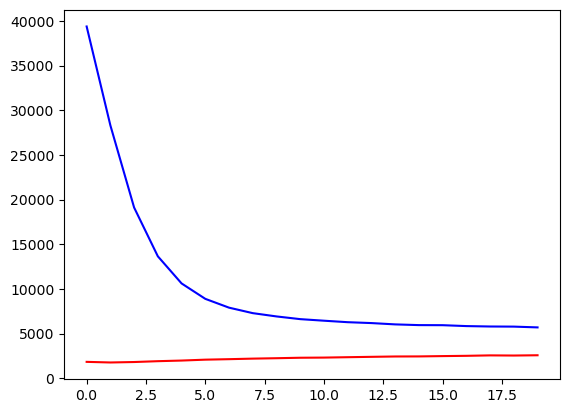

In [34]:
from matplotlib import pyplot as plt
plt.plot (list(v_train),c='r')
plt.plot (list(l_train),c='b')


In [35]:
model=autocomplete().cuda()
trie=0

loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
schedular=torch.optim.lr_scheduler.ReduceLROnPlateau(optim,verbose=True,patience=5)
l_train=[]
v_train=[]
cur=122121
for i in range(20):
    model.train()
    t_l=0
    o=0
    a_t=0
    for (a,b) in train_set:
        r=model(a.cuda())
        l=loss(r,b.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        t_l+=l.item()
        o+=1
        k=calculate_accuracy(r,b)
        a_t+=k
        
        print(f"\r iter {o}  train loss {l.item()} , accuracy : { k}",end='')
    
    
    v_l=0
    model.eval()
    print()
    a_v=0
    with torch.no_grad():

        for (a,b) in valid_set:
            r=model(a.cuda())
            l=loss(r,b.cuda())
            v_l+=l.item()
            k=calculate_accuracy(r,b)
            a_v+=k
    if (cur<=t_l)    :
        trie+=1
    else:
        trie=0   
    cur=t_l
    if (trie==4):break       
    schedular.step(t_l)
    l_train.append(t_l)
    v_train.append(v_l)
    print(f"train loss: {t_l/len(train_set) } accuracy : {a_t/len(train_set)  }  , valid : {v_l/ len(valid_set)} accuracy : {a_v / len(valid_set) }")

 iter 6250  train loss 6.23844575881958 , accuracy : 15.625
train loss: 6.385642018051147 accuracy : 11.682  , valid : 5.924277975917243 accuracy : 15.545127795527156
 iter 6250  train loss 4.430939197540283 , accuracy : 31.25
train loss: 4.93487677822113 accuracy : 22.527  , valid : 5.592943723971089 accuracy : 25.43929712460064
 iter 6250  train loss 3.423563003540039 , accuracy : 43.75
train loss: 3.2253367269325257 accuracy : 42.45  , valid : 5.747969181012041 accuracy : 32.64776357827476
 iter 6250  train loss 2.2403502464294434 , accuracy : 65.625
train loss: 1.9649115655231475 accuracy : 61.5745  , valid : 6.125961108710438 accuracy : 33.855830670926515
 iter 6250  train loss 1.3068543672561646 , accuracy : 71.875
train loss: 1.280870475308895 accuracy : 74.6935  , valid : 6.512699399893276 accuracy : 34.185303514377
 iter 6250  train loss 0.9276700019836426 , accuracy : 75.0
train loss: 0.9790811179244518 accuracy : 81.1445  , valid : 6.742636189293176 accuracy : 33.95567092651

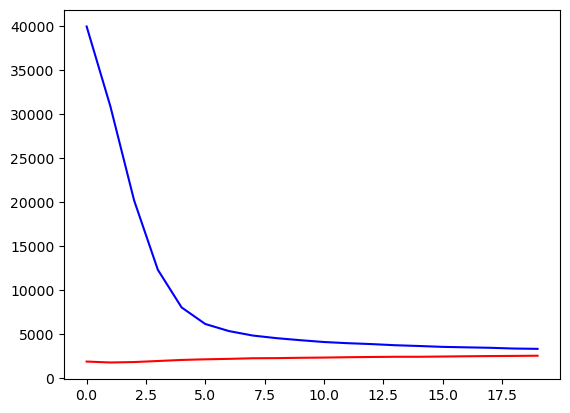

In [36]:
from matplotlib import pyplot as plt
plt.plot (list(v_train),c='r')
plt.plot (list(l_train),c='b')


In [37]:
model5=autocomplete().cuda()
loss5=nn.CrossEntropyLoss()
optim5=torch.optim.Adam(model5.parameters())
schedular5=torch.optim.lr_scheduler.ReduceLROnPlateau(optim5,verbose=True,patience=5)

In [38]:
cur=213123
trie=0

l_train=[]
v_train=[]
for i in range(20):
    model5.train()
    t_l=0
    o=0
    a_t=0
    for (a,b) in train_set5:
        r=model5(a.cuda())
        l=loss5(r,b.cuda())
        optim5.zero_grad()
        l.backward()
        optim5.step()
        t_l+=l.item()
        o+=1
        k=calculate_accuracy(r,b)
        a_t+=k
        
        print(f"\r iter {o}  train loss {l.item()} , accuracy : { k}",end='')
    
    
    v_l=0
    model5.eval()
    print()
    a_v=0
    with torch.no_grad():

        for (a,b) in valid_set5:
            r=model5(a.cuda())
            l=loss5(r,b.cuda())
            v_l+=l.item()
            k=calculate_accuracy(r,b)
            a_v+=k
    schedular5.step(t_l)
    l_train.append(t_l)
    v_train.append(v_l)
    if (cur<=t_l)    :
        trie+=1
    else:
        trie=0   
    cur=t_l
    if (trie==4):break
    print(f"train loss: {t_l/len(train_set5) } accuracy : {a_t/len(train_set5)  }  , valid : {v_l/ len(valid_set5)} accuracy : {a_v / len(valid_set5) }")

 iter 6250  train loss 5.970873832702637 , accuracy : 12.5
train loss: 6.400567518005371 accuracy : 11.452  , valid : 5.936770276139719 accuracy : 15.175718849840255
 iter 6250  train loss 4.498296737670898 , accuracy : 25.0
train loss: 4.944675718612671 accuracy : 22.4  , valid : 5.509178874591669 accuracy : 27.216453674121407
 iter 6250  train loss 2.808056354522705 , accuracy : 50.0
train loss: 3.0873446433830263 accuracy : 44.5485  , valid : 5.634045533859692 accuracy : 33.59624600638978
 iter 6250  train loss 2.3219640254974365 , accuracy : 43.75
train loss: 1.6540946363019944 accuracy : 66.654  , valid : 6.053716479779813 accuracy : 35.90255591054313
 iter 6250  train loss 1.534517526626587 , accuracy : 68.75
train loss: 0.8927161578536034 accuracy : 81.406  , valid : 6.505809077058737 accuracy : 35.93250798722045
 iter 6250  train loss 0.8843926191329956 , accuracy : 78.125
train loss: 0.5919733448469638 accuracy : 87.9235  , valid : 6.850890034684739 accuracy : 36.2020766773162

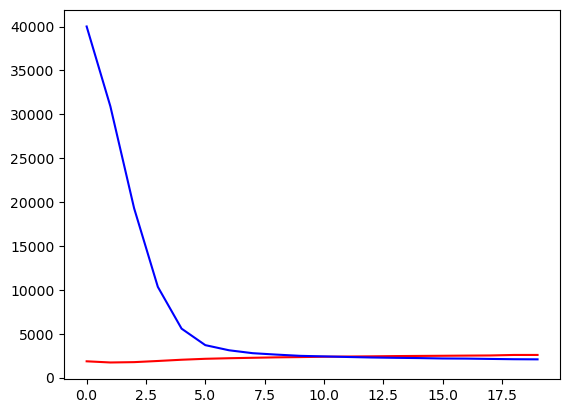

In [39]:
from matplotlib import pyplot as plt
plt.plot (list(v_train),c='r')
plt.plot (list(l_train),c='b')


In [40]:
model6=autocomplete().cuda()
loss=nn.CrossEntropyLoss()
trie=0

optim=torch.optim.Adam(model6.parameters())
schedular=torch.optim.lr_scheduler.ReduceLROnPlateau(optim,verbose=True,patience=5)

In [41]:
l_train=[]
v_train=[]
cur=123213
for i in range(20):
    model6.train()
    t_l=0
    o=0
    a_t=0
    for (a,b) in train_set6:
        r=model6(a.cuda())
        l=loss(r,b.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        t_l+=l.item()
        o+=1
        k=calculate_accuracy(r,b)
        a_t+=k
        
        print(f"\r iter {o}  train loss {l.item()} , accuracy : { k}",end='')
    
    
    v_l=0
    model6.eval()
    print()
    a_v=0
    with torch.no_grad():

        for (a,b) in valid_set6:
            r=model6(a.cuda())
            l=loss(r,b.cuda())
            v_l+=l.item()
            k=calculate_accuracy(r,b)
            a_v+=k
    schedular.step(t_l)
    l_train.append(t_l)
    v_train.append(v_l)
    if (cur<=t_l)    :
        trie+=1
    else:
        trie=0   
    cur=t_l
    if (trie==4):break
    print(f"train loss: {t_l/len(train_set6) } accuracy : {a_t/len(train_set6)  }  , valid : {v_l/ len(valid_set6)} accuracy : {a_v / len(valid_set6) }")

 iter 6250  train loss 6.21581506729126 , accuracy : 6.25
train loss: 6.379111438369751 accuracy : 11.398  , valid : 5.925386506528519 accuracy : 15.095846645367413
 iter 6250  train loss 4.323724746704102 , accuracy : 25.0
train loss: 4.899945353660583 accuracy : 22.8405  , valid : 5.464128981002222 accuracy : 27.675718849840255
 iter 6250  train loss 3.5951414108276367 , accuracy : 43.75
train loss: 3.0153693667030335 accuracy : 45.667  , valid : 5.607708556964375 accuracy : 34.29512779552716
 iter 6250  train loss 0.9324226975440979 , accuracy : 75.0
train loss: 1.6014282879447936 accuracy : 67.436  , valid : 6.054089197335533 accuracy : 36.0323482428115
 iter 6250  train loss 0.9025862216949463 , accuracy : 75.0
train loss: 0.8449906309127808 accuracy : 81.7885  , valid : 6.4919828766831955 accuracy : 36.162140575079874
 iter 6250  train loss 1.6061115264892578 , accuracy : 71.875
train loss: 0.5470996378183365 accuracy : 88.002  , valid : 6.794089171833123 accuracy : 36.0822683706

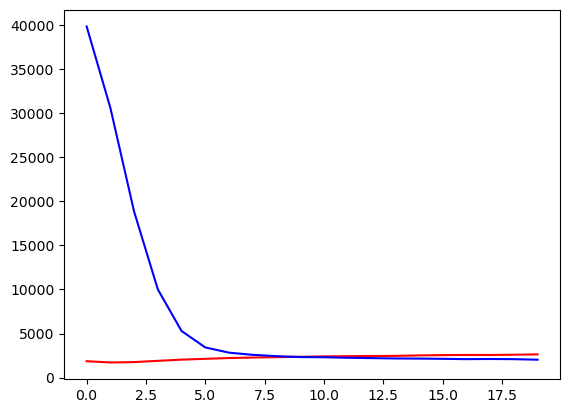

In [42]:
from matplotlib import pyplot as plt
plt.plot (list(v_train),c='r')
plt.plot (list(l_train),c='b')


In [43]:
model7=autocomplete().cuda()
trie=0

loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
schedular=torch.optim.lr_scheduler.ReduceLROnPlateau(optim,verbose=True,patience=5)
l_train=[]
v_train=[]
for i in range(20):
    model7.train()
    t_l=0
    o=0
    a_t=0
    for (a,b) in train_set:
        r=model7(a.cuda())
        l=loss(r,b.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        t_l+=l.item()
        o+=1
        k=calculate_accuracy(r,b)
        a_t+=k
        
        print(f"\r iter {o}  train loss {l.item()} , accuracy : { k}",end='')
    
    
    v_l=0
    model7.eval()
    print()
    a_v=0
    with torch.no_grad():

        for (a,b) in valid_set7:
            r=model7(a.cuda())
            l=loss(r,b.cuda())
            v_l+=l.item()
            k=calculate_accuracy(r,b)
            a_v+=k
    schedular.step(t_l)
    l_train.append(t_l)
    v_train.append(v_l)
    print(f"train loss: {t_l/len(train_set7) } accuracy : {a_t/len(train_set7)  }  , valid : {v_l/ len(valid_set7)} accuracy : {a_v / len(valid_set7) }")

 iter 6250  train loss 9.874445915222168 , accuracy : 0.0
train loss: 9.8737848777771 accuracy : 0.003  , valid : 9.874030558065103 accuracy : 0.0
 iter 6250  train loss 9.87747859954834 , accuracy : 0.0
train loss: 9.873784885101319 accuracy : 0.003  , valid : 9.874039723088567 accuracy : 0.0
 iter 6250  train loss 9.873370170593262 , accuracy : 0.0
train loss: 9.873784867706298 accuracy : 0.003  , valid : 9.874034488543916 accuracy : 0.0
 iter 6250  train loss 9.871286392211914 , accuracy : 0.0
train loss: 9.873784890136719 accuracy : 0.003  , valid : 9.874044747398303 accuracy : 0.0
 iter 6250  train loss 9.872720718383789 , accuracy : 0.0
train loss: 9.873784884033203 accuracy : 0.003  , valid : 9.874055000158926 accuracy : 0.0
 iter 6250  train loss 9.874283790588379 , accuracy : 0.0
train loss: 9.873784871826173 accuracy : 0.003  , valid : 9.87402865985712 accuracy : 0.0
 iter 6250  train loss 9.872559547424316 , accuracy : 0.0
Epoch 00007: reducing learning rate of group 0 to 1.

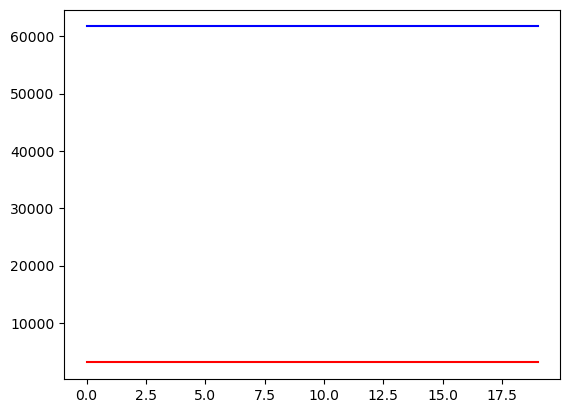

In [44]:
from matplotlib import pyplot as plt
plt.plot (list(v_train),c='r')
plt.plot (list(l_train),c='b')


In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def change4(x):
    return torch.tensor(pad_sequences([[vocab[i]  for i in simple_preprocess(x) ]] ,maxlen=4,value=0))

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def change5(x):
    return torch.tensor(pad_sequences([[vocab[i]  for i in simple_preprocess(x) ]] ,maxlen=5,value=0))

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def change6(x):
    return torch.tensor(pad_sequences([[vocab[i]  for i in simple_preprocess(x) ]] ,maxlen=6,value=0))

In [48]:
st='my name is mohamed i am egyptian so i am'
st=change6(st)[0][-5:].cuda()
l=len(st)
word=[]
while l<30:
    idx=torch.argmax(model6(torch.tensor(st[None]).cuda()))
    word.append(inx_word[idx.item()])
    st=torch.concat( [st[-4:],torch.tensor([idx]).cuda()] )
    l+=1
print(' '.join(word))    

started who have access to find which words are the most relevant to our classification while we still have access to the coefficients of our


In [49]:
st='my name is mohamed i am egyptian '
st=change5(st)[0][-4:].cuda()
l=len(st)
word=[]
while l<30:
    idx=torch.argmax(model5(torch.tensor(st[None]).cuda()))
    word.append(inx_word[idx.item()])
    st=torch.concat( [st[-3:],torch.tensor([idx]).cuda()] )
    l+=1
print(' '.join(word))    

offer where two isn large companies that are case study taught in startups that uses their artwork his concept of the chat its naive point for


In [50]:
st='my name is mohamed i am egyptian so i am '
st=change4(st)[0][-3:].cuda()
l=0
word=[]
while l<9:
    idx=torch.argmax(model(torch.tensor(st[None]).cuda()))
    word.append(inx_word[idx.item()])
    st=torch.concat( [st[-2:],torch.tensor([idx]).cuda()] )
    l+=1
print(' '.join(word))    

still had most powerful space of your skills can


In [51]:
torch.save(model.state_dict(),'model.pth')

In [52]:
torch.save(model6.state_dict(),'model6.pth')

In [53]:
model6.state_dict()

OrderedDict([('embedding.weight',
              tensor([[-2.1392, -1.0212,  0.1478,  ...,  0.0662,  1.0020,  0.3603],
                      [-0.1445, -0.4446, -0.8705,  ..., -1.1417,  0.9226,  1.0231],
                      [ 0.3734, -1.2435,  0.6849,  ..., -1.1884,  0.6829,  0.2082],
                      ...,
                      [-0.7910, -0.2219, -1.4520,  ..., -0.7714, -0.9203,  0.3345],
                      [-0.5111, -0.3273,  0.3274,  ...,  1.0000, -0.0437,  0.5314],
                      [-0.4735,  0.6184, -2.0686,  ..., -0.0277, -0.7766, -0.2770]],
                     device='cuda:0')),
             ('lstm1.weight_ih_l0',
              tensor([[ 0.1461,  0.0530,  0.6054,  ..., -0.1822,  0.3148, -0.0791],
                      [ 0.0440, -0.0702, -0.2809,  ...,  0.2234,  0.2337, -0.0354],
                      [ 0.3021, -0.1954,  0.3931,  ..., -0.1930, -0.1739, -0.5284],
                      ...,
                      [-0.6053, -0.3604, -0.1271,  ..., -0.4603, -0.8400, -0.39

In [54]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save
model_scripted = torch.jit.script(model5) # Export to TorchScript
model_scripted.save('model5_scripted.pt') # Save
model_scripted = torch.jit.script(model6) # Export to TorchScript
model_scripted.save('model6_scripted.pt') # Save
model_scripted = torch.jit.script(model7) # Export to TorchScript
model_scripted.save('model7_scripted.pt') # Save


In [55]:
import json

with open('word.json', 'w') as file:
    json.dump(vocab,file)

In [56]:
import json
with open('index.json', 'w') as file:
    json.dump(inx_word,file)